In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

import src.visualization as vs
import src.process as process
import models.lib as modlib
import src.json_cleaning as jc

from sklearn.metrics import make_scorer, accuracy_score, fbeta_score, recall_score, precision_score
from sklearn.metrics import classification_report, roc_curve, confusion_matrix

In [6]:
data = pd.read_csv('data/processed/kickstarter_clean.csv')


In [7]:
data.head()

,backers_count,country,staff_pick,state,usd_pledged,usd_type,converted_goal,len_blurb,len_name,launch_to_deadline,creation_to_launch,month,weekday,day_hour,category_name,parent_category
0,47,US,False,1,1950.00,domestic,1000.00,22.0,4,2592000,700366,August,Thursday,17,Playing Cards,games
1,271,US,False,1,22404.00,international,15000.00,15.0,7,2592000,19433862,May,Monday,5,Rock,music
2,3,GB,False,0,165.38,domestic,12160.66,23.0,8,5180400,465105,January,Thursday,18,Playing Cards,games
3,3,US,False,1,2820.00,domestic,2800.00,24.0,7,2592000,354456,December,Monday,20,Nonfiction,publishing
4,35,US,False,1,3725.00,domestic,3500.00,18.0,4,2592000,13769396,April,Thursday,2,Classical Music,music


In [152]:
data2.category_slug.nunique()

15

In [7]:
data = data.drop(['usd_pledged','backers_count'], axis=1)

In [8]:
vs.nice_summary(data)

,Columns,Dtype,nunique,Non-Null Count,Missing,Missing %,Zero Count,mean,std,min,25%,50%,75%,max
0,country,object,22,192664,-,-,0,-,-,-,-,-,-,-
1,staff_pick,bool,2,192664,-,-,166671,-,-,-,-,-,-,-
2,state,int64,2,192664,-,-,75199,0.61,0.49,0.0,0.0,1.0,1.0,1.0
3,converted_goal,float64,45248,192664,-,-,0,37787.67,1065708.76,0.01,1500.0,5000.0,12447.04,152350076.0
4,len_blurb,float64,35,192662,2,-,0,18.89,5.01,1.0,16.0,20.0,22.0,35.0
5,len_name,int64,20,192664,-,-,0,5.77,2.71,1.0,4.0,6.0,8.0,27.0
6,launch_to_deadline,int64,47963,192664,-,-,0,2798775.41,1006330.46,86400.0,2588400.0,2592000.0,2905085.25,8044324.0
7,creation_to_launch,int64,160540,192664,-,-,0,4109730.82,11239239.62,236.0,258137.5,983526.5,3183470.0,285428640.0
8,category_name,object,159,192664,-,-,0,-,-,-,-,-,-,-


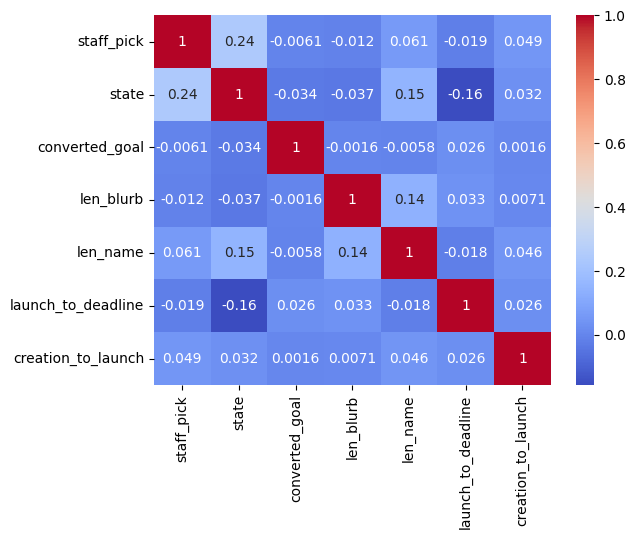

In [9]:
# Create a correlation matrix
corr = data.corr()

# Create a heatmap using seaborn
sns.heatmap(corr, cmap="coolwarm", annot=True)

# Show the plot
plt.show()

In [10]:
#Base line model
accuracy_score(data.state, data.staff_pick)

0.5015571149773699

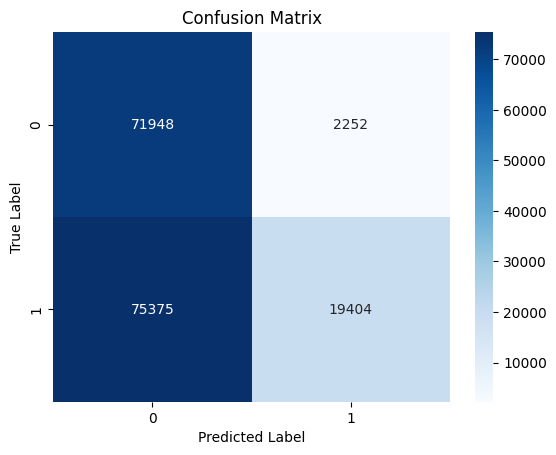

In [8]:
# Calculate the confusion matrix of the base line model
cm = confusion_matrix(data.state, data.staff_pick)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [1]:
df = data.copy()
df.head()

NameError: name 'data' is not defined

In [ ]:
df['state'] = data['state'].replace({0:'failed', 1 :'successful'})
df['staff_pick'] = data['staff_pick'].replace({True:'picked', False:"not picked"})
sns.countplot(data = df, x = 'staff_pick', hue = 'state')

<AxesSubplot:xlabel='Name length in words', ylabel='count'>

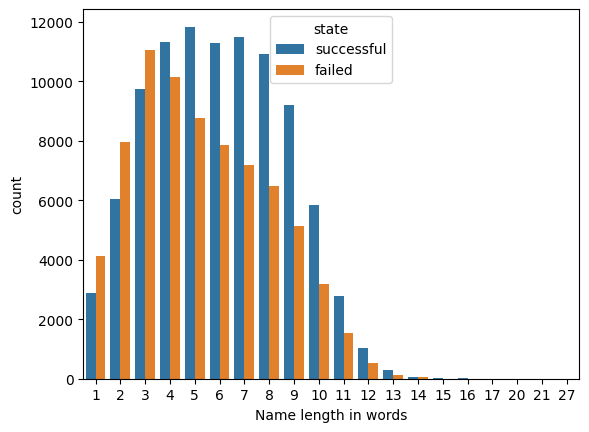

In [11]:
df.rename(columns={'len_name': 'Name length in words', 'len_blurb' : 'Description length in words'}, inplace = True)
sns.countplot(data = df, x = 'Name length in words', hue = 'state')

<AxesSubplot:xlabel='Name length in words', ylabel='state'>

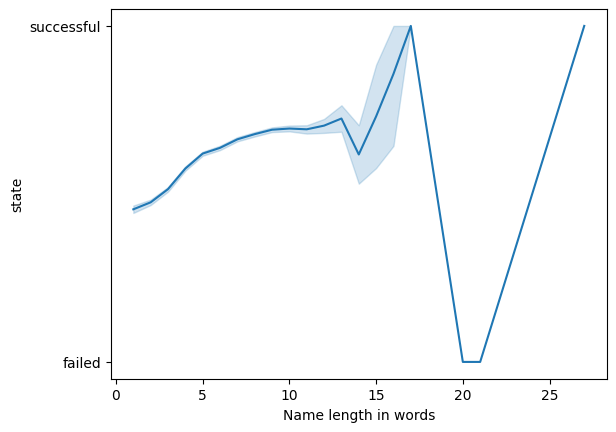

In [33]:
sns.lineplot(data = df, x ='Name length in words', y = 'state')

<AxesSubplot:xlabel='Description length in words', ylabel='count'>

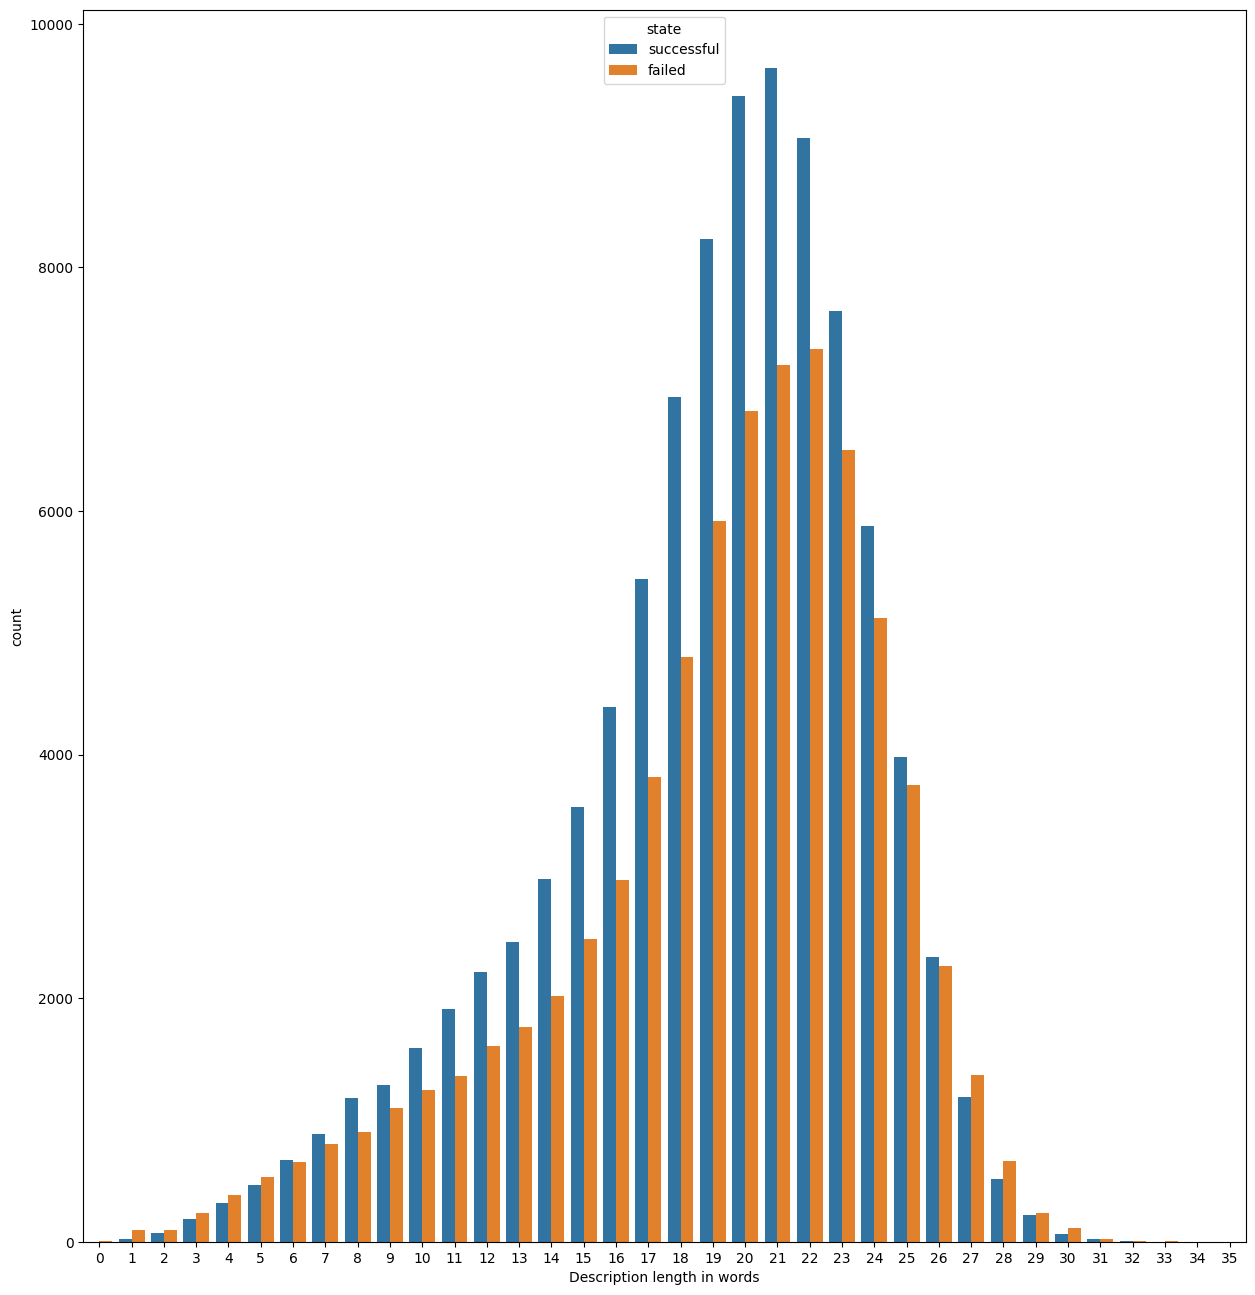

In [12]:
plt.subplots(figsize=(15, 16))
df['Description length in words'].fillna(0, inplace = True)
df['Description length in words'] = df['Description length in words'].astype(int)
sns.countplot(data = df, x = 'Description length in words', hue= 'state')

In [35]:
df.columns

Index(['country', 'staff_pick', 'state', 'converted_goal',
       'Description length in words', 'Name length in words',
       'launch_to_deadline', 'creation_to_launch', 'category_name'],
      dtype='object')

<AxesSubplot:xlabel='Run time in days', ylabel='count'>

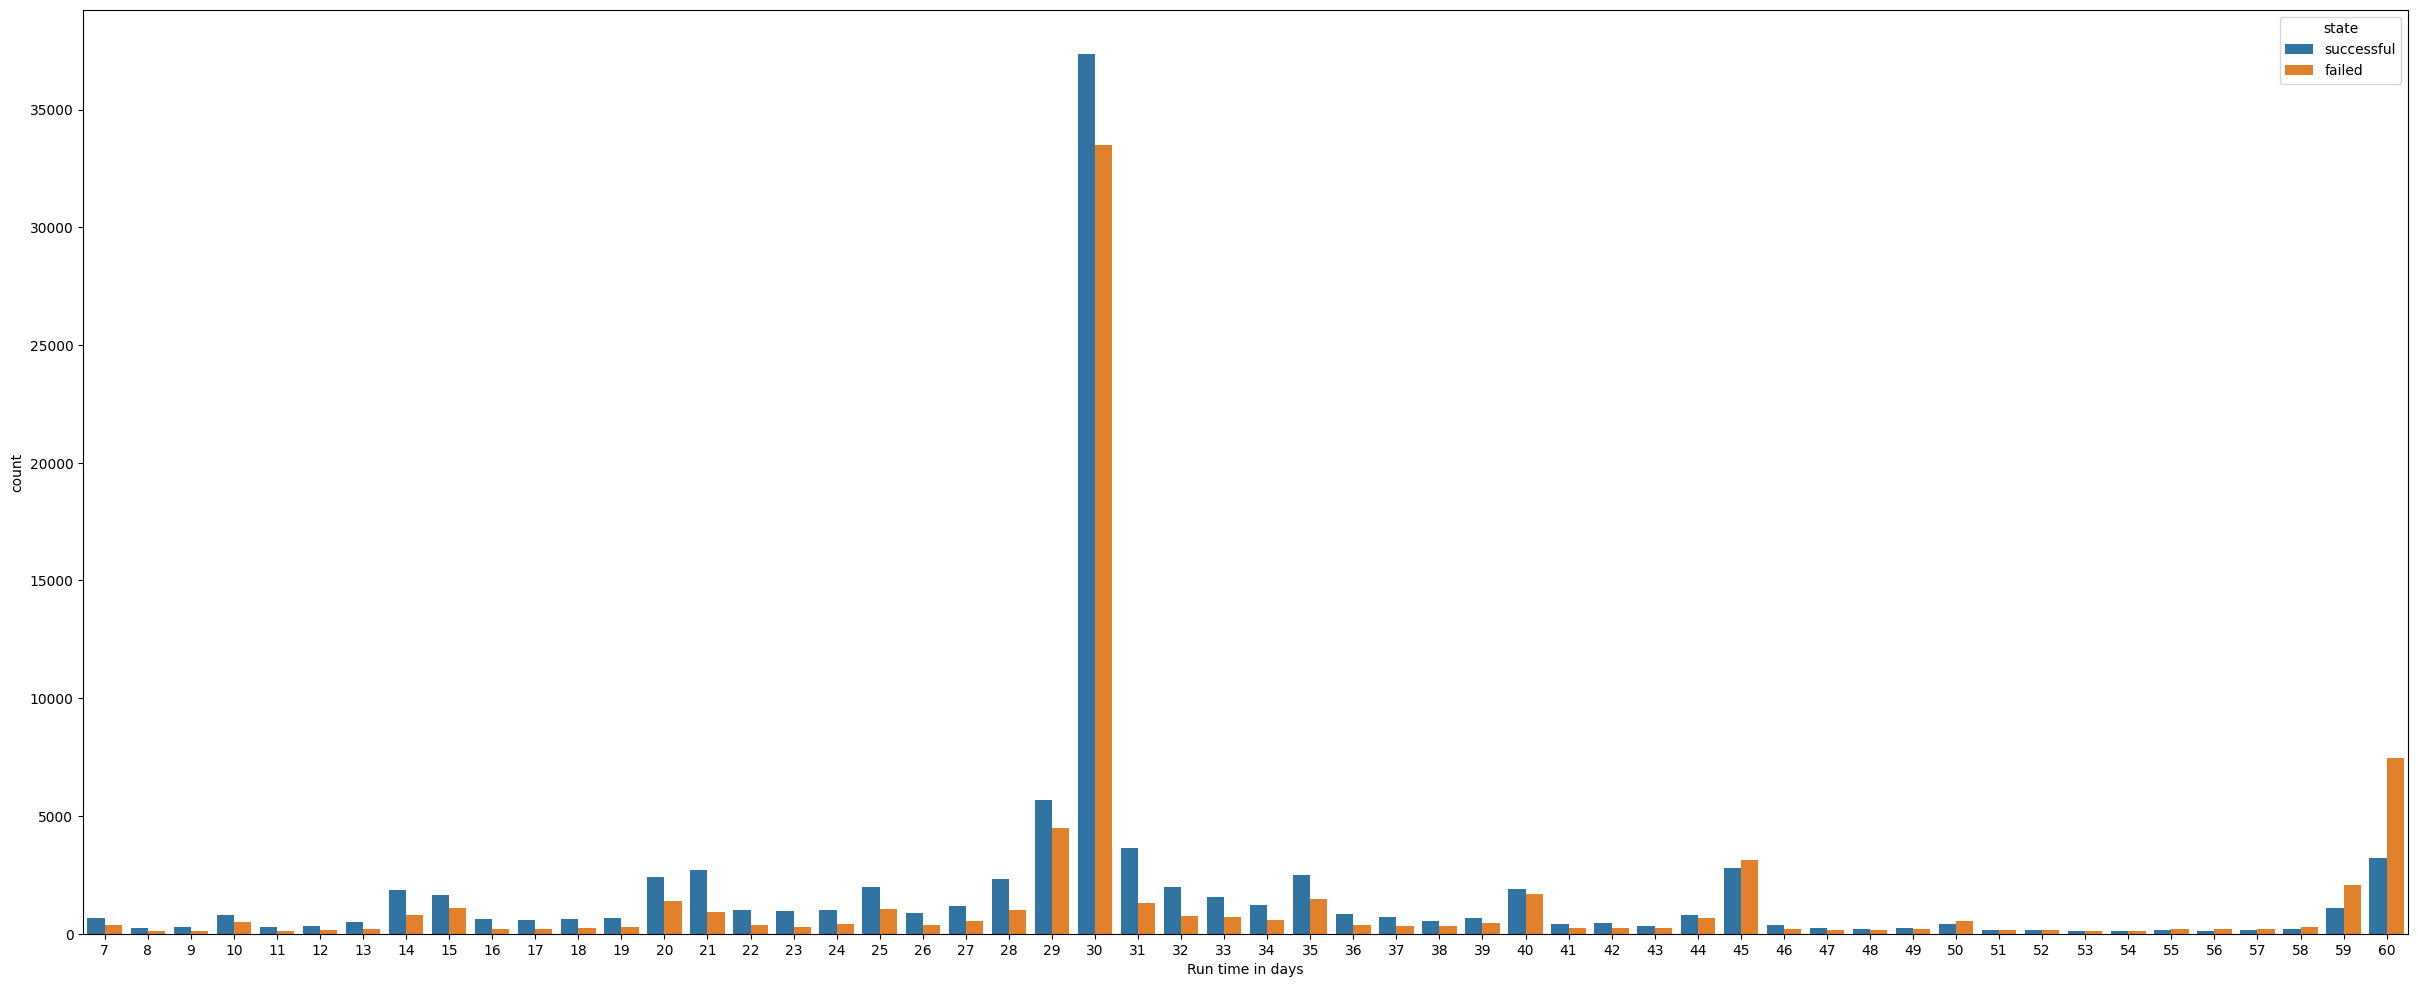

In [13]:
plt.subplots(figsize=(30, 12))
df['Run time in days'] = df.launch_to_deadline/60/60//24
df['Run time in days'] = df['Run time in days'].astype(int)

filtered = df[(df['Run time in days'] < 61) & (df['Run time in days'] > 6)]

sns.countplot(data = filtered, x = 'Run time in days', hue = 'state')


In [15]:
df.head()

,backers_count,country,staff_pick,state,usd_pledged,usd_type,converted_goal,len_blurb,len_name,launch_to_deadline,creation_to_launch,month,weekday,day_hour,category_name,parent_category
0,47,US,False,1,1950.00,domestic,1000.00,22.0,4,2592000,700366,August,Thursday,17,Playing Cards,games
1,271,US,False,1,22404.00,international,15000.00,15.0,7,2592000,19433862,May,Monday,5,Rock,music
2,3,GB,False,0,165.38,domestic,12160.66,23.0,8,5180400,465105,January,Thursday,18,Playing Cards,games
3,3,US,False,1,2820.00,domestic,2800.00,24.0,7,2592000,354456,December,Monday,20,Nonfiction,publishing
4,35,US,False,1,3725.00,domestic,3500.00,18.0,4,2592000,13769396,April,Thursday,2,Classical Music,music


In [ ]:
# Create a histogram with hue
sns.histplot(data=df, x="converted_goal", hue="state", kde=True)

<AxesSubplot:xlabel='country', ylabel='count'>

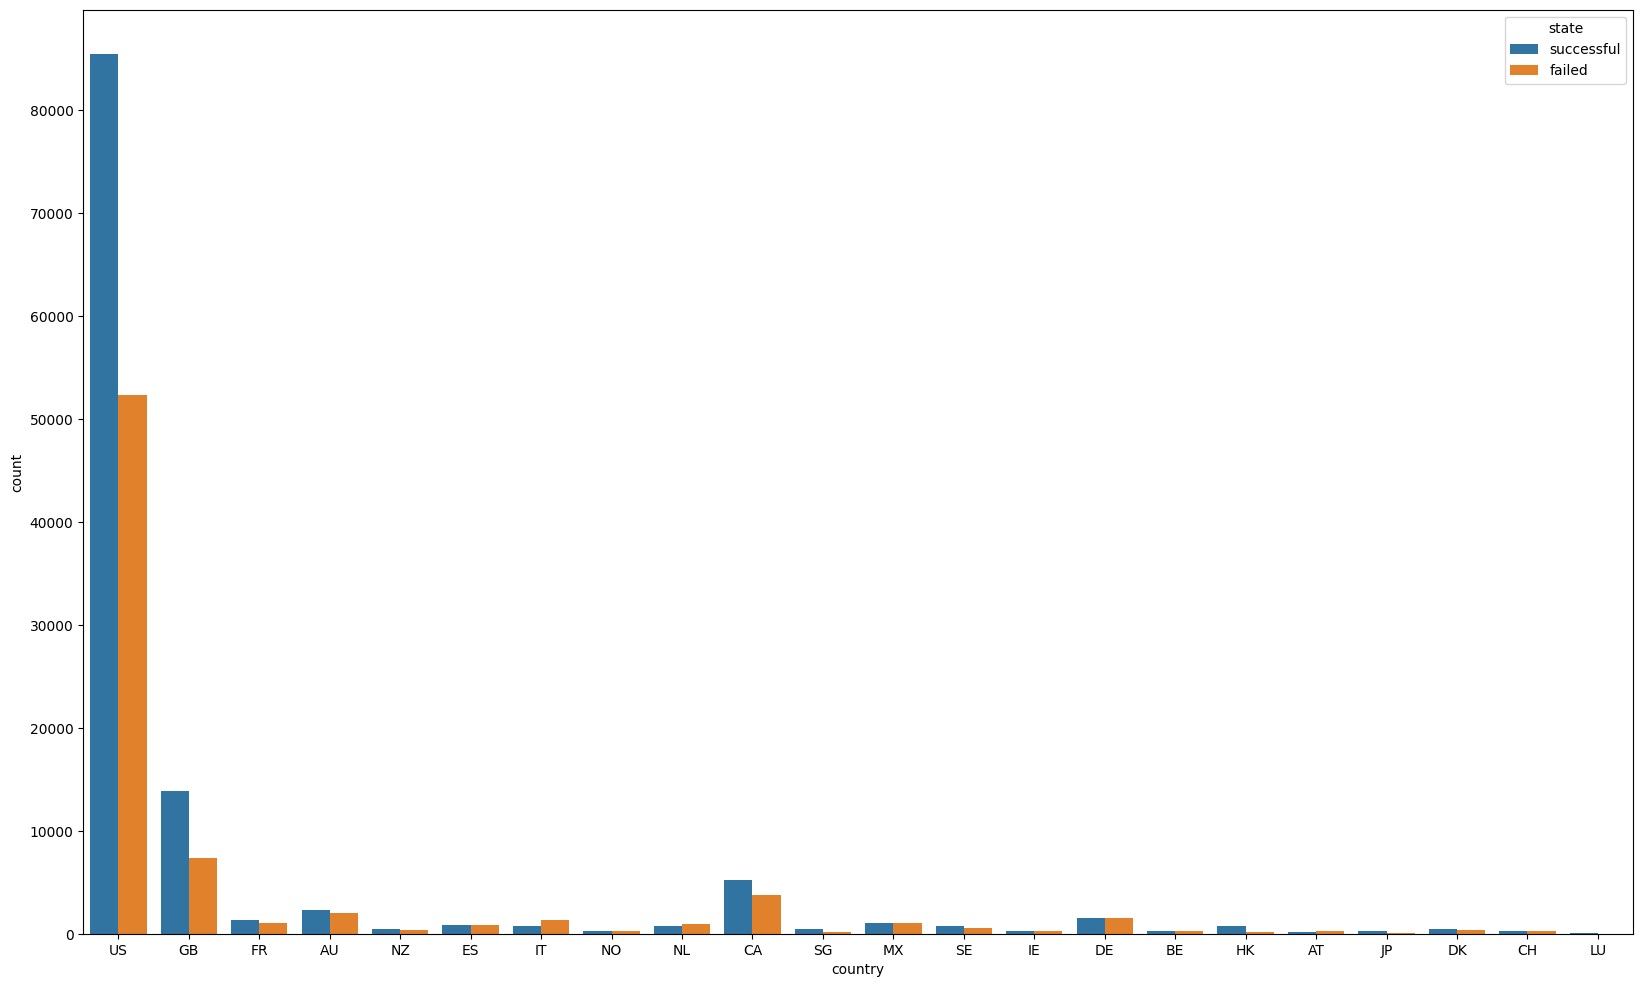

In [127]:
plt.subplots(figsize=(20, 12))
sns.countplot(data = df, x= 'country', hue = 'state')

<AxesSubplot:xlabel='country'>

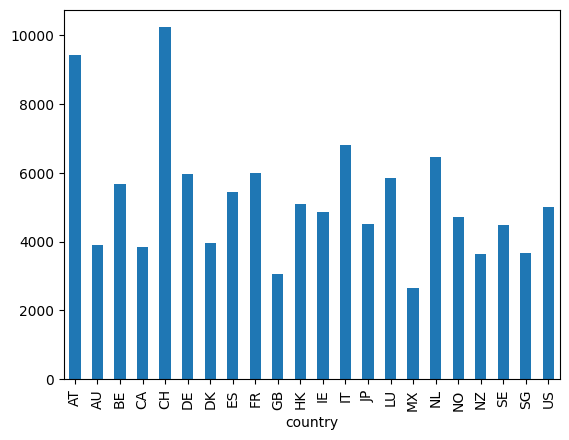

In [135]:
df.groupby('country').converted_goal.median().plot(kind='bar')

In [3]:
df.groupby('country').usd_pledged.mean().plot(kind='bar')

NameError: name 'df' is not defined

<AxesSubplot:xlabel='month'>

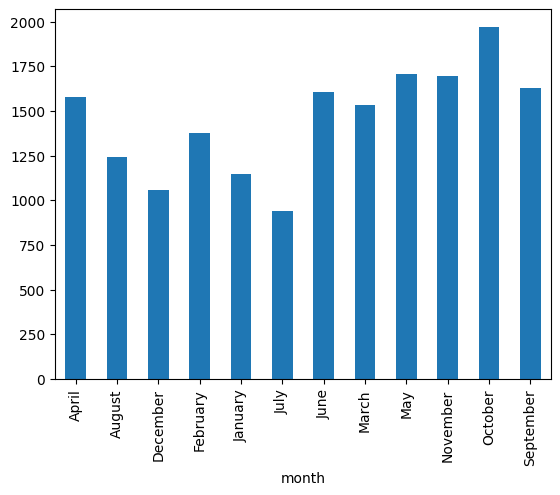

In [26]:
df.groupby('month').usd_pledged.median().plot(kind='bar')

<AxesSubplot:xlabel='parent_category'>

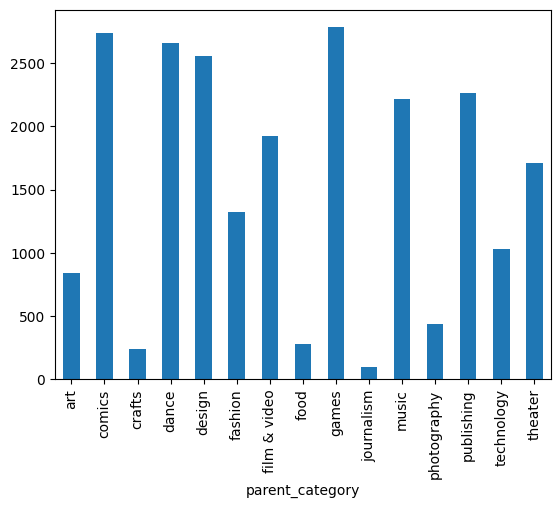

In [29]:
df.groupby('parent_category').usd_pledged.median().plot(kind='bar')

In [24]:
df.columns

Index(['backers_count', 'country', 'staff_pick', 'state', 'usd_pledged',
       'usd_type', 'converted_goal', 'len_blurb', 'len_name',
       'launch_to_deadline', 'creation_to_launch', 'month', 'weekday',
       'day_hour', 'category_name', 'parent_category'],
      dtype='object')